### Se pide:

A partir del archivo "USA_Housing.csv", realizar la regresión lineal entre cada columna numérica con la columna 'price'. 

Cuando existe una columna(variable) que es la que se quiere comparar, se le llama 'target'. 

In [1]:
# importing librarires
import numpy as np # linear algebra
import pandas as pd # data prçocessing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')

In [2]:
import pandas as pd

df = pd.read_csv("../data/USA_Housing.csv")
df

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price,Address
0,79545.458574,5.682861,7.009188,4.09,23086.800503,1.059034e+06,"208 Michael Ferry Apt. 674\r\nLaurabury, NE 37..."
1,79248.642455,6.002900,6.730821,3.09,40173.072174,1.505891e+06,"188 Johnson Views Suite 079\r\nLake Kathleen, ..."
2,61287.067179,5.865890,8.512727,5.13,36882.159400,1.058988e+06,"9127 Elizabeth Stravenue\r\nDanieltown, WI 064..."
3,63345.240046,7.188236,5.586729,3.26,34310.242831,1.260617e+06,USS Barnett\r\nFPO AP 44820
4,59982.197226,5.040555,7.839388,4.23,26354.109472,6.309435e+05,USNS Raymond\r\nFPO AE 09386
...,...,...,...,...,...,...,...
4995,60567.944140,7.830362,6.137356,3.46,22837.361035,1.060194e+06,USNS Williams\r\nFPO AP 30153-7653
4996,78491.275435,6.999135,6.576763,4.02,25616.115489,1.482618e+06,"PSC 9258, Box 8489\r\nAPO AA 42991-3352"
4997,63390.686886,7.250591,4.805081,2.13,33266.145490,1.030730e+06,"4215 Tracy Garden Suite 076\r\nJoshualand, VA ..."
4998,68001.331235,5.534388,7.130144,5.44,42625.620156,1.198657e+06,USS Wallace\r\nFPO AE 73316


<AxesSubplot:>

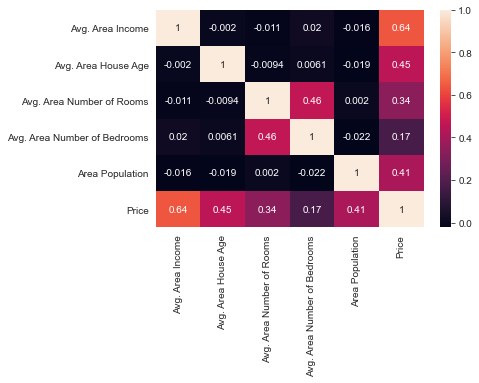

In [3]:
sns.heatmap(df.corr(), annot= True)

In [4]:
x1 = df['Avg. Area Income']
x1 = np.array(x1)
x1= x1.reshape(-1,1)

In [5]:
y = df['Price']
y.shape

(5000,)

In [6]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x1, y, test_size=0.2, random_state= 101)

In [7]:
X_train.shape

(4000, 1)

In [8]:
X_test.shape

(1000, 1)

In [9]:
from sklearn.linear_model import LinearRegression

In [10]:
lm = LinearRegression(n_jobs=-1)

In [11]:
lm.fit(X_train, y_train)

LinearRegression(n_jobs=-1)

In [12]:
print(lm.intercept_)

-215047.77188411704


In [13]:
lm.coef_

array([21.08845731])

In [14]:
lm.score(X_train, y_train) * 100

40.63479319730665

In [15]:
predictions = lm.predict(X_test)

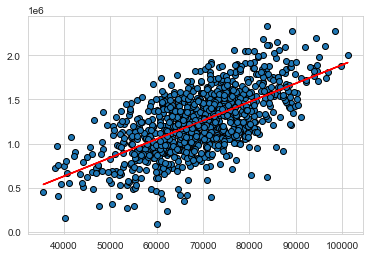

In [16]:
plt.scatter(X_test, y_test, edgecolor='black')
plt.plot(X_test, predictions, color= 'red')

C:\Users\jarai\AppData\Local\Programs\Python\Python37\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Price', ylabel='Density'>

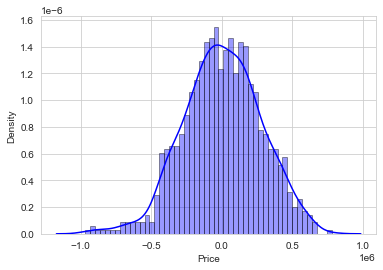

In [17]:
sns.distplot((y_test - predictions), bins = 50, hist_kws=dict(edgecolor="black", linewidth=1),color='Blue')

In [18]:
from sklearn import metrics

In [19]:
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

MAE: 217619.5644321996
MSE: 74402787880.48894
RMSE: 272768.7443247282


In [20]:
x2 = df['Avg. Area House Age']
x2 = np.array(x2)
x2= x2.reshape(-1,1)
x2.shape

(5000, 1)

In [21]:
x2_train, x2_test, y_train, y_test = train_test_split(x2, y, test_size=0.2, random_state=None)

In [22]:
lm.fit(x2_train, y_train)

LinearRegression(n_jobs=-1)

In [23]:
lm.intercept_

272002.53979739314

In [24]:
lm.coef_

array([160680.92947715])

In [25]:
lm.score(x2_train, y_train) * 100

20.27341910153304

In [26]:
predictions = lm.predict(x2_test)

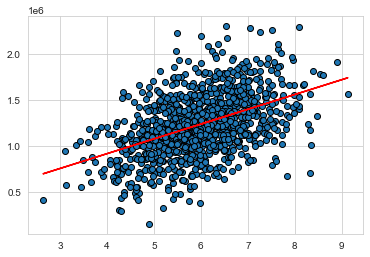

In [27]:
plt.scatter(x2_test, y_test, edgecolors='black')
plt.plot(x2_test, predictions, color= 'red')

C:\Users\jarai\AppData\Local\Programs\Python\Python37\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Price', ylabel='Density'>

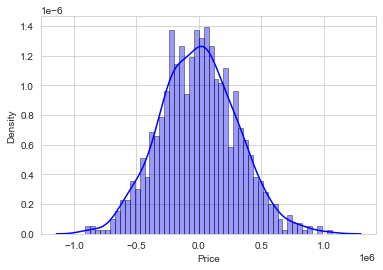

In [28]:
sns.distplot((y_test - predictions), bins = 50, hist_kws=dict(edgecolor="black", linewidth=1),color='Blue')

In [29]:
x3 = df['Avg. Area Number of Rooms']
x3 = np.array(x3)
x3 = x3.reshape(-1,1)
x3.shape

(5000, 1)

In [30]:
x3_train, x3_test, y_train, y_test = train_test_split(x3, y, test_size= 0.2, random_state= None)

In [31]:
lm2 = LinearRegression(n_jobs= -1)
lm2.fit(x3_train, y_train)

LinearRegression(n_jobs=-1)

In [32]:
lm2.score(x3_train, y_train) * 100

11.817999736606543

In [33]:
predictions = lm2.predict(x3_test)

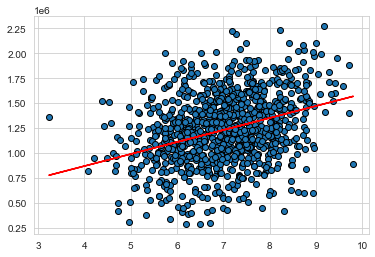

In [34]:
plt.scatter(x3_test,y_test, edgecolors='black')
plt.plot(x3_test, predictions, color= 'red')

In [35]:
x4 = df['Avg. Area Number of Bedrooms']
x4 = np.array(x4)
x4 = x4.reshape(-1, 1)
x4.shape

(5000, 1)

In [36]:
x4_train, x4_test, y_train, y_test = train_test_split(x4, y, test_size=0.2, random_state=None)

In [37]:
lm3 = LinearRegression(n_jobs=-1)

In [38]:
lm3.fit(x4_train, y_train)

LinearRegression(n_jobs=-1)

In [39]:
lm3.intercept_

1018506.7782383636

In [40]:
lm3.coef_

array([54058.74533374])

In [41]:
lm3.score(x4_train, y_train) * 100

3.612891614972491

In [42]:
resultss = lm3.predict(x4_test)

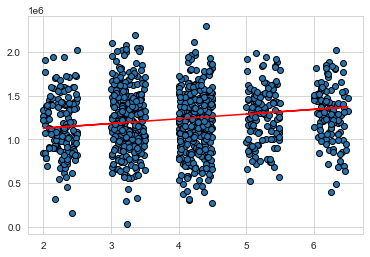

In [43]:
plt.plot(x4_test, resultss, color= 'red')
plt.scatter(x4_test, y_test, edgecolors='black')

In [44]:
x5 = df['Area Population']
x5 = np.array(x5)
x5 = x5.reshape(-1,1)

In [45]:
x5_train, x5_test, y_train, y_test = train_test_split(x5, y, test_size= 0.2, random_state= None)

In [46]:
lm4= LinearRegression(n_jobs=-1)
lm4.fit(x5_train, y_train)

LinearRegression(n_jobs=-1)

In [47]:
lm4.intercept_

696915.7054314936

In [48]:
lm4.coef_

array([14.73484991])

In [49]:
prediction = lm4.predict(x5_test)

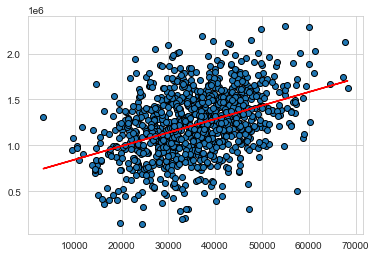

In [51]:
plt.scatter(x5_test,y_test, edgecolors='black')
plt.plot(x5_test, prediction, color= 'red')